# [Markdown Guide cheat Sheet](https://www.markdownguide.org/cheat-sheet/)



# Info:

- ### instrumentalness: vocals in a track

- ### speechiness: detects the pressents of vocal words in a track

- ### music genre: 10 different types
	0. Electronic
    1. Classical
    2. Jazz
    3. anime
    4. Rock
    5. country
    6. Rap
    7. Blues
    8. Hip-Hop
    9.Alternative

# problems with table:

1. ~~negative duration~~
2. ~~missing tempos~~
3. ~~rows 10000-10005 are nan values for every column~~
4. negative loudness



## imports

In [1]:

import pandas as pd
import plotly.express as px
import numpy as np
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report,roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import seaborn as sns

from sklearn import preprocessing

#makes theme dark for all ploty visuals
pio.templates.default = "plotly_dark"


## Functions

In [2]:
def stringToInt(dataFrame,col):
    test = {}
    for i in dict(enumerate(dataFrame[col].unique())).items():#is a dictionary of the keys and corespodening number
        #makes it so the keys and values of the dictionary switch
        test[i[1]]=i[0]
    print(test,'\n')
    return dataFrame[col].map(test)

## Dropping things:



In [3]:
#importing datasets
music_data = pd.read_csv("music_genre.csv")
df = music_data.copy(deep=True)

#dropping columns
badInfo = ["instance_id","obtained_date","artist_name","track_name"]
df.drop(columns=badInfo,axis=1,inplace=True)

#dropping null rows
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True) #Very good practice to reset how your rows are counted when you drop rows.

#fixing tempo
df["tempo"]=df["tempo"].replace("?",np.nan)
df["tempo"] = df["tempo"].astype("float")
df["tempo"]=df.groupby("music_genre")["tempo"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['tempo'] = np.around(df['tempo'],2)

#fixing duration
df["duration_ms"]=df["duration_ms"].replace(-1.0,np.nan)
df["duration_ms"]=df.groupby("music_genre")["duration_ms"].transform(lambda x: x.fillna(x.mean(skipna=True)))
df['duration_ms'] = np.around(df['duration_ms'],2)


#change the values from string to int
df['key'] = stringToInt(df,'key')
df['mode'] = stringToInt(df,'mode')
df['music_genre_name'] = df['music_genre']
df['music_genre'] = stringToInt(df,'music_genre')

{'A#': 0, 'D': 1, 'G#': 2, 'C#': 3, 'F#': 4, 'B': 5, 'G': 6, 'F': 7, 'A': 8, 'C': 9, 'E': 10, 'D#': 11} 

{'Minor': 0, 'Major': 1} 

{'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 'Hip-Hop': 9} 



# Naïve Bayes

In [5]:

X = df.loc[:,df.columns[:-2]]#input_columns
y= df['music_genre']#what we want

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# gnb = GaussianNB()
# y_hat = gnb.fit(X_train, y_train).predict(X_test)
# total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
# mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 




# labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']

# print(mean_squared_error)
# print(f1_score(y_test, y_hat, average=None))
# print(classification_report(y_test, y_hat, labels=[i for i in range(len(labels))]))


# sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)


In [0]:
#px.bar(confusion_matrix(y_test, y_hat), x=y_test, y=y_hat, color=y_hat)

# xgboost

Overall Accuracy:  0.6491
5.4102


<AxesSubplot:>

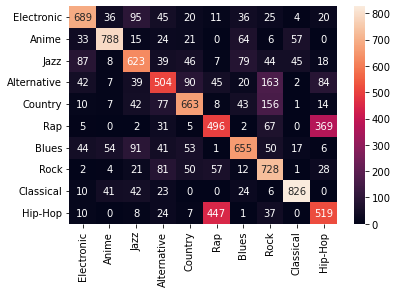

In [10]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
y_pred = model.fit(X_train, y_train).predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy: ", accuracy)

total_squared_error = (np.sum((y_test - y_pred)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

#confusion matrix
labels = ['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop']
# sns.heatmap(confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

In [11]:
print((np.sum((y_test - y_pred)**2))/len(y_test) )#mean squared error
print(f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred,target_names=[i+":" for i in labels]))

5.4102
[0.72033455 0.80696365 0.63120567 0.53474801 0.67105263 0.4841386
 0.6724846  0.64254192 0.85818182 0.49171009]
              precision    recall  f1-score   support

 Electronic:       0.74      0.70      0.72       981
      Anime:       0.83      0.78      0.81      1008
       Jazz:       0.64      0.63      0.63       996
Alternative:       0.57      0.51      0.53       996
    Country:       0.69      0.65      0.67      1021
        Rap:       0.46      0.51      0.48       977
      Blues:       0.70      0.65      0.67      1012
       Rock:       0.57      0.74      0.64       984
  Classical:       0.87      0.85      0.86       972
    Hip-Hop:       0.49      0.49      0.49      1053

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



# visuals:



In [0]:
#histogram showing number of songs per genre
df["music_genre_name"].hist(figsize = (10, 10))

In [6]:
px.bar(df.sort_values(by=["tempo"]), x='popularity', y='tempo', color='music_genre_name')

In [0]:
px.scatter_3d(df, x = "speechiness", y = "duration_ms", z = "popularity", color = "music_genre", template = "plotly_dark")

# alternative and country are extremely similar here
# rock popularity > 50; duration < 1M; speechiness < .6
# blues popularity < 50; duration ~< 1M; speechiness < .6
    # separated by rock by ppularity (and few outliers in popularity and duration)
# classical has widest range of popularity and comparitively wide range of duration and fairly wide range of speechiness (overall widest ranges)

# distinct genre differences:
    # Classical vs Hip Hop
    # Rock vs Blues
    # Electronic vs Hip Hop
    # Electronic vs Rock
    # Alternative vs Classical
    # Rap vs Classical
    # Rap vs Rock
    # Country vs Anime
    # Jazz vs Hip Hop
    # Jazz vs Rock
    # Jazz vs Rap
    # Anime vs Jazz (?)
    # Alternative vs Anime
    # Anime vs Hip Hop

In [1]:
#makes it so tempo is in acending order
df = df.sort_values(by=["tempo"])

px.scatter(df.sort_values(by=["tempo"]), x = "loudness", y = "tempo", color = "music_genre_name", size="duration_ms",size_max=50,trendline="lowess")


NameError: name 'df' is not defined

In [0]:
px.scatter_matrix(df, dimensions = ["loudness", "energy", "danceability", "acousticness"], color = "music_genre", template="plotly_dark")

In [0]:
px.scatter(df, x = "loudness", y = "instrumentalness", color = "music_genre", template="plotly_dark")

In [0]:
px.scatter(df, x='loudness', y='energy', template="plotly_dark", color='popularity')

# loudness and energy are positively correlated
# louder songs are more popular
# higher energy songs are more popular
# the most popular songs are both loud and energetic
# maximum loudness and maximum energy decrease popularity

In [0]:
px.scatter(df, x = "danceability", y = "loudness", color = "music_genre", template="plotly_dark")

In [0]:
px.scatter(df, x='danceability', y='loudness', template="plotly_dark", color='popularity')

# popular songs are around 0 to -15 loudness
# popular danceable songs are closer to 0 loudness
# non danceable songs tend to be more unpopular than danceable songs
# as danceability increases, the loudness compresses

In [0]:
#df = df.sort_values(by=["music_genre_name"])

px.bar(df.sort_values(by=["music_genre_name"]), x='popularity', y='acousticness', color='music_genre_name')

# non danceable songs are of the highest acoustecness
# danceability and popularity are not correlated
# for each popularity, the least danceable songs tend to have the highest acousticness (at least until about 45 popularity)***

In [0]:
px.scatter(df, x = "danceability", y = "acousticness", color = "music_genre", template="plotly_dark")

In [0]:
px.scatter(df, x='danceability', y='acousticness', template="plotly_dark", color='popularity')

# highly popular danceable songs are low acoustic
# non popular danceable songs are high acoustic
# overall high acousticness correlates with low popularity and low acousticness correlates with high popularity
# danceability and acousticness are not correlated

In [0]:
df = df.sort_values(by=["acousticness"])

px.bar(df, x='popularity', y='acousticness', template="plotly_dark",color='music_genre')

# as popularity increases, average acousticness decreases after popularity of 35
    # as popularity increases to 35, average acousticness increases
# non popular songs also have low acousticness
    # popularity of 20 or less have acousticness of below 100
# know that songs with popularity of 0 have full range of acousticness

In [2]:

df = df.sort_values(by=["key"])
px.bar(df, x='music_genre_name', y='tempo',color='key',template="plotly_dark")

# tempo is highest for classical
# tempo is lowest for electronic
# clear pattern in tempo per genre

NameError: name 'df' is not defined